In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import categorical_crossentropy
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [2]:
data = pd.read_csv("../datasets/mnist_train_small.csv").values

In [3]:
X = data[:, 2:]
y = data[:, 1]

In [4]:
ohe = OneHotEncoder(categories="auto")

In [5]:
y_hot = ohe.fit_transform(y.reshape(-1, 1)).todense()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [7]:
X.shape

(8000, 784)

In [8]:
layer_1 = Dense(100, activation="tanh", input_shape=[X.shape[1]])
layer_3 = Dense(50, activation="tanh")
layer_4 = Dense(y_hot.shape[1], activation="softmax")
model = Sequential()
model.add(layer_1)
model.add(layer_3)
model.add(layer_4)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [10]:
model.fit(X_train, y_train, epochs=40, batch_size=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
5360/5360 [==============================] - 1s 98us/step - loss: 1.4390 - acc: 0.5459
Epoch 2/40
5360/5360 [==============================] - 0s 40us/step - loss: 0.7410 - acc: 0.7935
Epoch 3/40
5360/5360 [==============================] - 0s 26us/step - loss: 0.5592 - acc: 0.8451
Epoch 4/40
5360/5360 [==============================] - 0s 26us/step - loss: 0.4974 - acc: 0.8567
Epoch 5/40
5360/5360 [==============================] - 0s 27us/step - loss: 0.4327 - acc: 0.8761
Epoch 6/40
5360/5360 [==============================] - 0s 25us/step - loss: 0.4179 - acc: 0.8797
Epoch 7/40
5360/5360 [==============================] - 0s 24us/step - loss: 0.3853 - acc: 0.8897
Epoch 8/40
5360/5360 [==============================] - 0s 38us/step - loss: 0.3836 - acc: 0.8819
Epoch 9/40
5360/5360 [==============================] - 0s 34us/step - loss: 0.3681 - acc: 0.8905
Epoch 10/40
5360/5360 [==============================] - 0s 34us/step 

In [11]:
model.evaluate(X_test, y_test)

2640/2640 [==============================] - 0s 38us/step


[0.3373398076404225, 0.9022727272727272]

In [12]:
np.argmax(model.predict(X_test[:1]), axis=1)

array([9])

In [13]:
y_test[0]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [14]:
model.predict(X_test[:1])

array([[4.9871005e-07, 8.1975304e-06, 2.7956551e-06, 1.0053227e-03,
        9.6514006e-04, 1.4741041e-05, 2.2108154e-06, 6.3192629e-04,
        1.7003159e-04, 9.9719918e-01]], dtype=float32)

In [16]:
import cv2

In [146]:
one = cv2.imread("../datasets/nums/eight.jpeg")

In [147]:
gray = cv2.cvtColor(one, cv2.COLOR_BGR2GRAY)

In [148]:
small = cv2.resize(gray, (28, 28))

In [149]:
small = (small < 100).astype(int) * 255

In [150]:
np.argmax(model.predict(np.array([small.flatten()])))

3

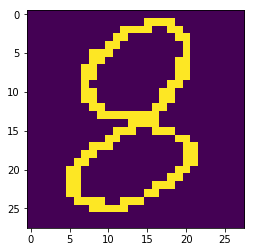

In [151]:
plt.imshow(small)